In [71]:
import pandas as pd
import numpy as np

from keras.layers import Dropout
from keras import regularizers, optimizers
from keras.layers import Input, Conv1D, Dense, Flatten, Activation, UpSampling1D, MaxPooling1D, ZeroPadding1D, TimeDistributed
from keras.models import Model, load_model
from keras.layers.core import Reshape

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model


# Dataset
We use the ECG dataset available [here](https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_train.csv). There is [an article](https://arxiv.org/pdf/1805.00794.pdf) that uses the dataset, which we can use as a reference. More details about the dataset can be found [here](https://physionet.org/content/apnea-ecg/1.0.0/)

1. Train only on normal cases. --> determine average error.
2. Use the error as the threshold for decisions
3. Check if the error differs significantly for other classes.

## Load the datasets

In [72]:
train = pd.read_csv('data/mitbih_train.csv', low_memory=False, header=None)
train.shape

(87554, 188)

In [73]:
test = pd.read_csv('data/mitbih_test.csv', low_memory=False, header=None)
test.shape

(21892, 188)

In [74]:
normal = pd.read_csv('data/ptbdb_normal.csv',low_memory=False, header=None)
normal.shape

(4046, 188)

In [75]:
abnormal = pd.read_csv('data/ptbdb_abnormal.csv', low_memory=False, header=None)
abnormal.shape

(10506, 188)

## Split into X and y

In [76]:
labels=np.where(train[187]==0)

In [77]:
X_train = train.to_numpy()[:,0:186]
y_train = train.to_numpy()[:,-1]#.reshape(-1,1)

#X_normal = train[train[187]==0]

X_train=X_train.reshape(-1,186,1)
X_train_normal = X_train[y_train == 0]
X_train_normal = X_train_normal[0:5000]
X_train_anomaly = X_train[y_train== 1]
X_train_anomaly2 = X_train[y_train== 2]
X_train_anomaly3 = X_train[y_train== 3]
X_train_anomaly4 = X_train[y_train== 4]


# TEST data
X_test = test.to_numpy()[:,0:186].reshape(-1,186,1)
y_test = test.to_numpy()[:,-1]#.reshape(-1,1)

X_test_normal = X_test[y_test == 0]
X_test_anomaly = X_test[y_test == 1]
X_test_anomaly2 = X_test[y_test == 2]
X_test_anomaly3 = X_test[y_test == 3]
X_test_anomaly4 = X_test[y_test == 4]

In [7]:
len(labels[0])

72471

In [10]:
len(np.where(train[187]==1)[0])

2223

In [23]:
X_normal = train[train[187]==0]

In [45]:
X_train.shape

(87554, 186, 1)

In [46]:
X_train_normal.shape

(5000, 186, 1)

## Train

In [78]:
def LSTM_AE(input_shape):
        
    inputs = Input(shape=input_shape)
    encoded = LSTM(32, activation='tanh', return_sequences=True)(inputs)
    encoded = LSTM(16, activation='tanh', return_sequences=False)(encoded)
        
    decoded = RepeatVector(input_shape[0])(encoded)
    decoded = LSTM(16, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(32, activation='tanh', return_sequences=True)(decoded)
    decoded = TimeDistributed(Dense(input_shape[1]))(decoded)
        
    sequence_autoencoder = Model(inputs, decoded)
    
    return sequence_autoencoder

In [ ]:
def LSTM_AE_Deep(input_shape):
    
    """
    Input shape = (data_dim, number_of_features)
    
    Returns both the autoencoder and just the encoder.
    """
    
    inputs = Input(shape=input_shape)
    encoded = LSTM(32, activation='tanh', return_sequences=True)(inputs)
    encoded = LSTM(16, activation='tanh', return_sequences=True)(encoded)
    encoded = LSTM(8, activation='tanh', return_sequences=False)(encoded)
    #encoded = LSTM(4, activation='relu', return_sequences=False)(encoded)
    
    decoded = RepeatVector(input_shape[0])(encoded)
    #decoded = LSTM(4, activation='relu', return_sequences=True)(decoded)
    decoded = LSTM(8, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(16, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(32, activation='tanh', return_sequences=True)(decoded)
    decoded = TimeDistributed(Dense(input_shape[1]))(decoded)
    
    sequence_autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)
    
    return (sequence_autoencoder, encoder)

In [34]:
def LSTM_AE_Deep_v2(input_shape):
    
    """
    Input shape = (data_dim, number_of_features)
    
    Returns both the autoencoder and just the encoder.
    """
    
    inputs = Input(shape=input_shape)
    encoded = LSTM(64, activation='tanh', return_sequences=True)(inputs)
    encoded = LSTM(32, activation='tanh', return_sequences=True)(encoded)
    encoded = LSTM(16, activation='tanh', return_sequences=False)(encoded)
    #encoded = LSTM(4, activation='relu', return_sequences=False)(encoded)
    
    decoded = RepeatVector(input_shape[0])(encoded)
    #decoded = LSTM(4, activation='relu', return_sequences=True)(decoded)
    decoded = LSTM(16, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(32, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(64, activation='tanh', return_sequences=True)(decoded)
    decoded = TimeDistributed(Dense(input_shape[1]))(decoded)
    
    sequence_autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)
    
    return (sequence_autoencoder, encoder)

In [55]:
def LSTM_AE_Deep_v3(input_shape):
    
    """
    Input shape = (data_dim, number_of_features)
    
    Returns both the autoencoder and just the encoder.
    """
    
    inputs = Input(shape=input_shape)
    encoded = LSTM(128, activation='tanh', return_sequences=True)(inputs)
    encoded = LSTM(64, activation='tanh', return_sequences=True)(inputs)
    encoded = LSTM(32, activation='tanh', return_sequences=True)(encoded)
    encoded = LSTM(16, activation='tanh', return_sequences=False)(encoded)
    #encoded = LSTM(4, activation='relu', return_sequences=False)(encoded)
    
    decoded = RepeatVector(input_shape[0])(encoded)
    #decoded = LSTM(4, activation='relu', return_sequences=True)(decoded)
    decoded = LSTM(16, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(32, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(64, activation='tanh', return_sequences=True)(decoded)
    decoded = LSTM(128, activation='tanh', return_sequences=True)(decoded)
    decoded = TimeDistributed(Dense(input_shape[1]))(decoded)
    
    sequence_autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)
    
    return (sequence_autoencoder, encoder)

In [23]:
def TCN_AE(input_shape = (100,8)):  
    input_layer = Input(shape=input_shape)
    
    filter_c = input_shape[0]#+input_shape[1] -1
    
    #encoder
    
    x = Conv1D(filters=int(filter_c), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, input_shape=input_shape,
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(input_layer)
    x = MaxPooling1D(pool_size = 2, strides=2)(x)
    x = Conv1D(filters=int(filter_c/2), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, 
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    x = MaxPooling1D(pool_size = 2, strides=2)(x)
    x = Conv1D(filters=int(filter_c/4), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, 
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    x = MaxPooling1D(pool_size = 2, strides=2)(x)
    x = Conv1D(filters=int(filter_c/8), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, 
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    x = Dense(int(filter_c/16), activation='relu')(x)
    encoder = Model(input_layer, x)
    
    #decoder
    x = UpSampling1D(size=2)(x)
    x = Conv1D(filters=int(filter_c/8), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, 
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    x = UpSampling1D(size=2)(x)
    x = Conv1D(filters=int(filter_c/4), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, 
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    x = UpSampling1D(size=2)(x)
    x = Conv1D(filters=int(filter_c/2), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, 
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    x = ZeroPadding1D(padding=(0,4))(x)
    x = Conv1D(filters=int(filter_c), kernel_size=2, dilation_rate=1,
                   padding='causal', strides=1, input_shape=input_shape,
                   kernel_regularizer = regularizers.l2(0.01), activation='relu')(x)
    #flat = Flatten()(conv_6)
    output_layer = TimeDistributed(Dense(input_shape[1]))(x)
    
    TCN = Model(inputs = input_layer, outputs = output_layer)
            
    return (TCN, encoder)

In [79]:
model = LSTM_AE((186,1))
model.summary()
model.compile(optimizer='adam', loss='mae', metrics=None)

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 186, 1)]          0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 186, 32)           4352      
_________________________________________________________________
lstm_43 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 186, 16)           0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 186, 16)           2112      
_________________________________________________________________
lstm_45 (LSTM)               (None, 186, 32)           6272      
_________________________________________________________________
time_distributed_15 (TimeDis (None, 186, 1)            33 

In [35]:
model = LSTM_AE_Deep_v2((186,1))[0]
model.summary()
model.compile(optimizer='adam', loss='mae', metrics=None)

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 186, 1)]          0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 186, 64)           16896     
_________________________________________________________________
lstm_29 (LSTM)               (None, 186, 32)           12416     
_________________________________________________________________
lstm_30 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 186, 16)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 186, 16)           2112      
_________________________________________________________________
lstm_32 (LSTM)               (None, 186, 32)           627

In [56]:
model = LSTM_AE_Deep_v3((186,1))[0]
model.summary()
model.compile(optimizer='adam', loss='mae', metrics=None)

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 186, 1)]          0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 186, 64)           16896     
_________________________________________________________________
lstm_36 (LSTM)               (None, 186, 32)           12416     
_________________________________________________________________
lstm_37 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 186, 16)           0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 186, 16)           2112      
_________________________________________________________________
lstm_39 (LSTM)               (None, 186, 32)           627

In [24]:
# TODO: output shape does not seem ok.
#model = TCN_AE((186,1))[0]
#model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 186, 1)]          0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 186, 186)          558       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 93, 186)           0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 93, 46)            17158     
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 46, 46)            0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 46, 46)            4278      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 23, 46)            0  

In [80]:
history = model.fit(X_train_normal, X_train_normal, epochs=5, verbose=1, shuffle=True, validation_split=0.05)

Epoch 1/5
149/149 [==============================] - 38s 253ms/step - loss: 0.1353 - val_loss: 0.1003
Epoch 2/5
149/149 [==============================] - 37s 250ms/step - loss: 0.0968 - val_loss: 0.0795
Epoch 3/5
149/149 [==============================] - 40s 270ms/step - loss: 0.0811 - val_loss: 0.0700
Epoch 4/5
149/149 [==============================] - 36s 243ms/step - loss: 0.0745 - val_loss: 0.0651
Epoch 5/5
149/149 [==============================] - 39s 260ms/step - loss: 0.0713 - val_loss: 0.0621


### Apply model on train
We will now compute the the loss for each class on the train set. This will guide us in setting a decision boundary, that we can later use on the test set.

In [37]:
from matplotlib import pyplot as plt

In [13]:
model.predict(X_train_normal).shape

(5000, 186, 1)

In [64]:
x_train_pred = model.predict(X_train_normal)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train_normal), axis=1)

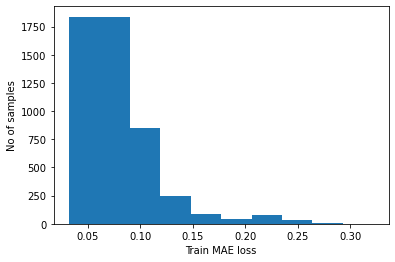

In [65]:
plt.hist(train_mae_loss, bins=10)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

In [66]:
print(np.max(train_mae_loss))

0.3218643922478922


In [ ]:
print(model.evaluate(X_train_normal,X_train_normal, verbose=3))
print(model.evaluate(X_train_anomaly2,X_train_anomaly2, verbose=3))
print(model.evaluate(X_train_anomaly3,X_train_anomaly3, verbose=3))
print(model.evaluate(X_train_anomaly4,X_train_anomaly4, verbose=3))

### Conclusion and test set
It's clear that our model (trained on fewer samples than we have) detects most of the nomalies (except class 3). Now, let's do the same on the test set. We can set the decision boundary to `0.16`.

In [15]:
print(model.evaluate(X_test_normal,X_test_normal, verbose=3))
print(model.evaluate(X_test_anomaly,X_test_anomaly, verbose=3))
print(model.evaluate(X_test_anomaly2,X_test_anomaly2, verbose=3))
print(model.evaluate(X_test_anomaly3,X_test_anomaly3, verbose=3))
print(model.evaluate(X_test_anomaly4,X_test_anomaly4, verbose=3))

0.07309737056493759
0.07742656022310257
0.09911613911390305
0.07295534014701843
0.09004269540309906


In [58]:
from errormetrics import * 

In [59]:
x_normal_pred = model.predict(X_test_normal)
normal_mae_loss = np.mean(np.abs(x_normal_pred - X_test_normal), axis=1)

x_anomaly_pred = model.predict(X_test_anomaly)
anomaly_mae_loss = np.mean(np.abs(x_anomaly_pred - X_test_anomaly), axis=1)

x_anomaly2_pred = model.predict(X_test_anomaly2)
anomaly2_mae_loss = np.mean(np.abs(x_anomaly2_pred - X_test_anomaly2), axis=1)

x_anomaly3_pred = model.predict(X_test_anomaly3)
anomaly3_mae_loss = np.mean(np.abs(x_anomaly3_pred - X_test_anomaly3), axis=1)

x_anomaly4_pred = model.predict(X_test_anomaly4)
anomaly4_mae_loss = np.mean(np.abs(x_anomaly4_pred - X_test_anomaly4), axis=1)

In [60]:
error_threshold = 0.15

In [61]:
# test set with normal samples

# "positive" means it's normal. "negative" means there is an anomaly.

def compute_metrics(error_threshold):
    FN = len(normal_mae_loss[normal_mae_loss>=error_threshold])
    TP = len(normal_mae_loss[normal_mae_loss<error_threshold])

    FP = len(anomaly_mae_loss[anomaly_mae_loss<error_threshold]) +\
    len(anomaly2_mae_loss[anomaly2_mae_loss<error_threshold]) +\
    len(anomaly3_mae_loss[anomaly3_mae_loss<error_threshold]) +\
    len(anomaly4_mae_loss[anomaly4_mae_loss<error_threshold])

    TN = len(anomaly_mae_loss[anomaly_mae_loss>=error_threshold]) +\
    len(anomaly2_mae_loss[anomaly2_mae_loss>=error_threshold]) +\
    len(anomaly3_mae_loss[anomaly3_mae_loss>=error_threshold]) +\
    len(anomaly4_mae_loss[anomaly4_mae_loss>=error_threshold])


    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    F1_score = 2* (precision * recall)/(precision + recall)
    accurracy = (TP + TN) / (TP+TN+FP+FN)

    print(precision, "precision")
    print(recall, "recall")
    print(F1_score, "F1 score")
    print(accurracy, "accurracy")


In [181]:
def cost_function(error_threshold, metric='accuracy'):
    FN = len(normal_mae_loss[normal_mae_loss>=error_threshold])
    TP = len(normal_mae_loss[normal_mae_loss<error_threshold])

    FP = len(anomaly_mae_loss[anomaly_mae_loss<error_threshold]) +\
    len(anomaly2_mae_loss[anomaly2_mae_loss<error_threshold]) +\
    len(anomaly3_mae_loss[anomaly3_mae_loss<error_threshold]) +\
    len(anomaly4_mae_loss[anomaly4_mae_loss<error_threshold])

    TN = len(anomaly_mae_loss[anomaly_mae_loss>=error_threshold]) +\
    len(anomaly2_mae_loss[anomaly2_mae_loss>=error_threshold]) +\
    len(anomaly3_mae_loss[anomaly3_mae_loss>=error_threshold]) +\
    len(anomaly4_mae_loss[anomaly4_mae_loss>=error_threshold])

    if TP == 0 and FP == 0 or TP == 0 and FN==0:
        return 0
    
    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    F1_score = 2* (precision * recall)/(precision + recall)
    accuracy = (TP + TN) / (TP+TN+FP+FN)
    
    if metric=='accuracy':
        return accuracy
    elif metric=='f1_score':
        return F1_score
    else:
        raise ValueError('Not a valid metric')
    

In [187]:
import random
import math
def anneal(sol, metric='accuracy',it=100):
    old_cost = cost_function(sol, metric)
    T = 1.0
    T_min = 0.00001
    alpha = 0.9
    while T > T_min:
        i = 1
        while i <= it:
            new_sol = neighbor(sol)
            new_cost = cost_function(new_sol, metric)
            ap = acceptance_probability(old_cost, new_cost, T)
            if ap > random.random():
                sol = new_sol
                old_cost = new_cost
            i += 1
        T = T*alpha
    return sol, old_cost

def acceptance_probability(old_cost, new_cost, T):
    return math.exp((new_cost-old_cost)/T)

def neighbor(sol):
    #return sol + random.random()/100-0.005
    return random.random()

In [179]:
anneal(0.5)

(0.18030739751104596, 0.8352822949022474)

In [188]:
anneal(0.1, metric='f1_score',it=1000)

(0.18540983878905282, 0.9073060416827281)

In [105]:
compute_metrics(0.3)

0.8276823249862914 precision
0.9997240313500386 recall
0.9056047197640117 F1 score
0.8275169011511054 accurracy


In [101]:
compute_metrics(0.3218643922478922)

0.8277138157894737 precision
0.9999448062700077 recall
0.9057141428785682 F1 score
0.8276996162981911 accurracy


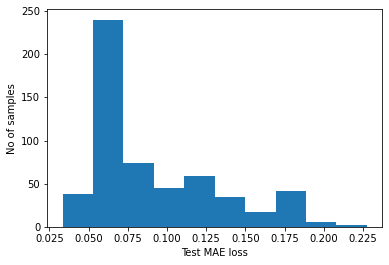

In [34]:
x_test_pred = model.predict(X_test_anomaly)
test_mae_loss = np.mean(np.abs(x_test_pred - X_test_anomaly), axis=1)
plt.hist(test_mae_loss, bins=10)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

In [35]:
#predicted_class1 = []


predicted_bad = test_mae_loss[test_mae_loss>0.15]
predicted_ok = test_mae_loss[test_mae_loss<0.15]

"""

print(len(predicted_ok))
print(len(predicted_bad))

for sample in X_test_anomaly:
    if model.evaluate(sample, sample, verbose=3) > 0.08:
        predicted_class1.append(1)
    else:
        predicted_class1.append(0)
"""

print(len(predicted_ok))
print(len(predicted_bad))

490
66


In [20]:
predicted_class2 = []

for sample in X_test_anomaly2:
    if model.evaluate(sample, sample, verbose=3) > 0.08:
        predicted_class2.append(1)
    else:
        predicted_class2.append(0)

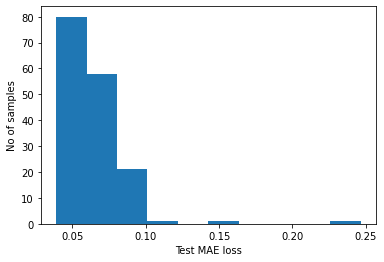

In [37]:
x_test_pred = model.predict(X_test_anomaly3)
test_mae_loss = np.mean(np.abs(x_test_pred - X_test_anomaly3), axis=1)
plt.hist(test_mae_loss, bins=10)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

